# Capítulo 10 - Aprendizado não supervisionado

## Lab 1: PCA

Esse exercício usa o dataset [USArrests](https://www.kaggle.com/deepakg/usarrests).

In [122]:
import pandas as pd
import numpy as np
import random

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv("../data/USArrests.csv", index_col=0)
column_names = df.columns

print(f"Tamanho do dataset: {df.shape}")

round(df.describe(), 2)

Tamanho do dataset: (50, 4)


,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.08
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.17
max,17.40,337.00,91.00,46.00


### Padronização

Conforme vimos nas anotações, é importante padronizarmos os valores antes de executar o PCA. Segue abaixo, uma comparação dos resultados obtidos sem padronização dos valores e com padronização:

In [85]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca_without_scaling = PCA(n_components=4, random_state=42, whiten=False)
pca_without_scaling.fit(df)

pca = PCA(n_components=4, random_state=42, whiten=False)
pca.fit(df_scaled)

print(f"""Proporção da variância explicada:
- Sem padronização: {pca_without_scaling.explained_variance_ratio_}
- Com padronização: {pca.explained_variance_ratio_}
""")



print(f"""Componentes:
- Sem padronização:
{pd.DataFrame(pca_without_scaling.components_, index=["PCA1", "PCA2", "PCA3", "PCA4"], columns=column_names)}

- Com padronização:
{pd.DataFrame(pca.components_, index=["PCA1", "PCA2", "PCA3", "PCA4"], columns=column_names)}
""")

Proporção da variância explicada:
- Sem padronização: [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]
- Com padronização: [0.62006039 0.24744129 0.0891408  0.04335752]

Componentes:
- Sem padronização:
        Murder   Assault  UrbanPop      Rape
PCA1  0.041704  0.995221  0.046336  0.075156
PCA2  0.044822  0.058760 -0.976857 -0.200718
PCA3  0.079891 -0.067570 -0.200546  0.974081
PCA4  0.994922 -0.038938  0.058169 -0.072325

- Com padronização:
        Murder   Assault  UrbanPop      Rape
PCA1  0.535899  0.583184  0.278191  0.543432
PCA2  0.418181  0.187986 -0.872806 -0.167319
PCA3 -0.341233 -0.268148 -0.378016  0.817778
PCA4  0.649228 -0.743407  0.133878  0.089024



### Plotando o PVE

Lembrando que PVE é a proprorção de variância explicada.

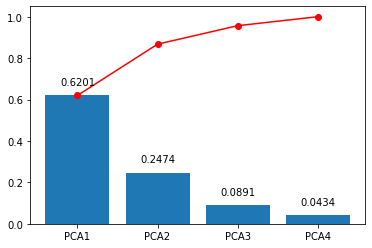

In [131]:
pve = pd.DataFrame(pca.explained_variance_ratio_, columns=["PVE"], index=["PCA1", "PCA2", "PCA3", "PCA4"])

plt.plot(pve.cumsum(), color="r", marker="o")
plt.bar(height=pve.values[:,0], x=[0,1,2,3]);

for x,y in zip([0,1,2,3],pve.values[:,0]):
    label = "{:.4f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

## Lab 3: NCI60 Data example

Esse exercício usa o dataset [NCI60](https://www.kaggle.com/ukveteran/nci-60-data).

In [136]:
df_nci60 = pd.read_csv("../data/NCI60.csv", index_col=0)
column_names = df_nci60.columns

print(f"Tamanho do dataset: {df_nci60.shape}")

df_nci60.head()

Tamanho do dataset: (64, 6831)


,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST


In [139]:
df_nci60["labs"].value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
K562A-repro    1
MCF7D-repro    1
MCF7A-repro    1
UNKNOWN        1
Name: labs, dtype: int64